In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [2]:
colors = ['maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

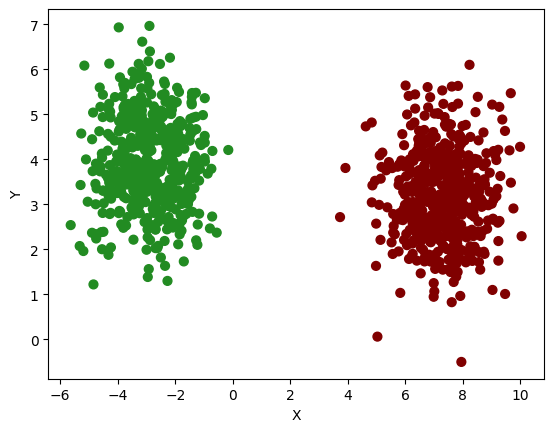

<Figure size 640x480 with 0 Axes>

In [3]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=2,
                    cluster_std=1, n_features=2)
plt.scatter(X1[:, 0], X1[:, 1], s=40, c=vectorizer(y1))
plt.xlabel("X")
plt.ylabel("Y")

plt.show()
plt.clf()

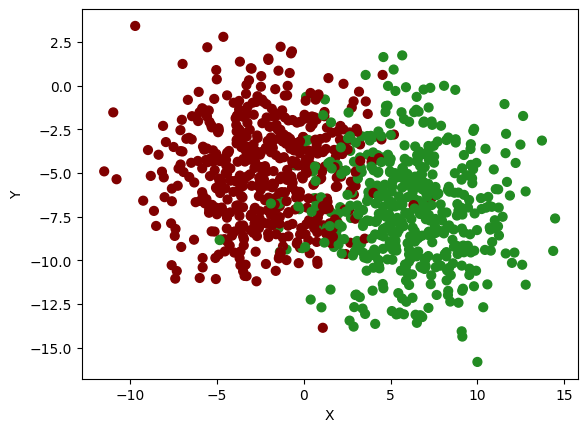

<Figure size 640x480 with 0 Axes>

In [11]:
from sklearn.datasets import make_blobs

X2, y2 = make_blobs(n_samples=1000, centers=2,
                    cluster_std=3, n_features=2)
plt.scatter(X2[:, 0], X2[:, 1], s=40, c=vectorizer(y2))
plt.xlabel("X")
plt.ylabel("Y")

plt.show()
plt.clf()

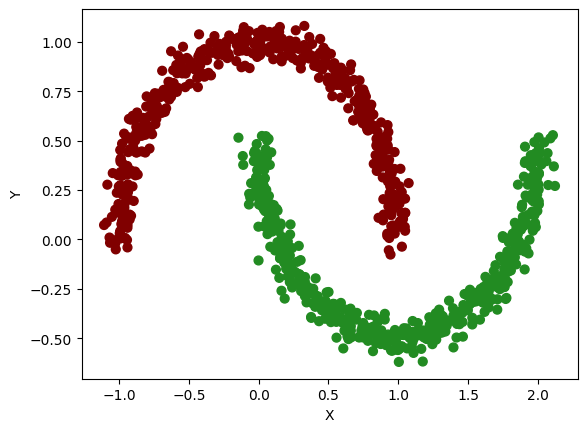

<Figure size 640x480 with 0 Axes>

In [12]:
from sklearn.datasets import make_moons

X3, y3 = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X3[:, 0], X3[:, 1], s=40, c=vectorizer(y3))
plt.xlabel("X")
plt.ylabel("Y")

plt.show()
plt.clf()

In [13]:
X1, X1_test, y1, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)
X2, X2_test, y2, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)
X3, X3_test, y3, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=42)

X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)


X1_test = np.array(X1_test)
X2_test = np.array(X2_test)
X3_test = np.array(X3_test)

y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)


y1_test = np.array(y1_test)
y2_test = np.array(y2_test)
y3_test = np.array(y3_test)

In [14]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for Xi, target in zip(X, y):
                update = self.eta * (target - self.predict(Xi))
                self.w_[1:] += update * Xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, 0)

In [15]:
class Adaline(object):

    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0, 1, -1)

In [16]:
class CombineAdalinePerceptron(object):

    def __init__(self, eta_a=0.01, eta_p=0.01, n_iter=10):
        self.eta_a = eta_a
        self.eta_p = eta_p
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_a = np.zeros(1 + X.shape[1])
        self.w_p = np.zeros(1 + X.shape[1])
        self.errors_a = []
        self.errors_p = []

        for _ in range(self.n_iter):
            errors = 0
            for Xi, target in zip(X, y):

                output_a = self.net_input_adaline(Xi)
                error_a = target - output_a
                self.w_a[1:] += self.eta_a * Xi.T.dot(error_a)


                self.w_p[0] = np.where(output_a >= 0, 1, -1)
                update = self.eta_p * (target - self.predict_perceptron(Xi))
                self.w_p[1:] += update * Xi

                errors += int(update != 0.0)
            self.errors_p.append(errors)
        return self

    def net_input_adaline(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_a[1:]) + 0

    def net_input_perceptron(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_p[1:]) + self.w_p[0]

    def predict_perceptron(self, X):
        return np.where(self.net_input_perceptron(X) >= 0, 1, 0)

    def predict(self, X):
        bias = np.where(self.net_input_adaline(X)>= 0, 1, -1)
        out = np.dot(X, self.w_p[1:]) + bias
        return np.where(out >= 0, 1, 0)

In [17]:
def plot_decision_regions(X, y, classifier, resolution=0.1):
    # setup marker generator and color map
    markers = ('o', '^', 's', 'x', 'v')
    colors = ('red', 'blue', 'white', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min,x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), np.arange(x2_min,x2_max,resolution))
    Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z =Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

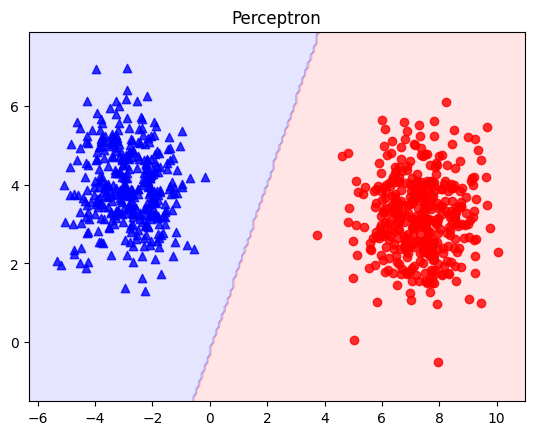

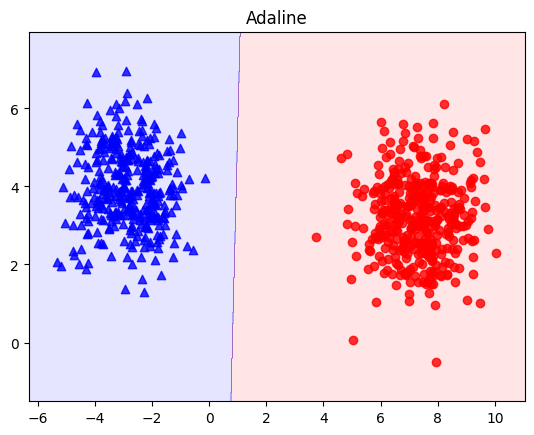

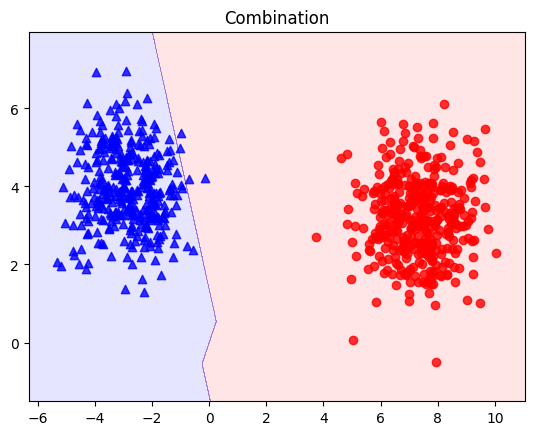


*****************************************

Perceptron Accuracy: 100.0%
Adaline Accuracy: 100.0%
Combination Accuracy: 100.0%


In [22]:
from sklearn.metrics import accuracy_score


ppn = Perceptron(eta=0.1,n_iter=100)
ppn.fit(X1,y1)
plot_decision_regions(X1, y1, classifier=ppn)
plt.title("Perceptron")
plt.show()


X_std = np.copy(X1)
X_std[:, 0] = (X_std[:, 0] - X_std.mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std.mean()) / X_std[:, 1].std()

ada = Adaline(n_iter=200, eta=0.0001).fit(X_std, y1)
plot_decision_regions(X1, y1, classifier=ada,resolution=0.01)
plt.title("Adaline")
plt.show()



comb = CombineAdalinePerceptron(eta_a=0.001,eta_p=0.1, n_iter=100).fit(X_std, y1)
plot_decision_regions(X1, y1, classifier=comb,resolution=0.01)
plt.title("Combination")
plt.show()


y_pred_perceptron = ppn.predict(X1_test)
y_pred_adaline = ada.predict(X1_test)
y_pred_comb = comb.predict(X1_test)

y_pred_adaline = [0 if label == -1 else label for label in y_pred_adaline]


# Evaluate
print("\n*****************************************\n")

print(f'Perceptron Accuracy: {accuracy_score(y_pred_perceptron, y1_test)*100}%' )
print(f'Adaline Accuracy: {accuracy_score(y_pred_adaline, y1_test)*100}%')
print(f'Combination Accuracy: {accuracy_score(y_pred_comb, y1_test)*100}%')


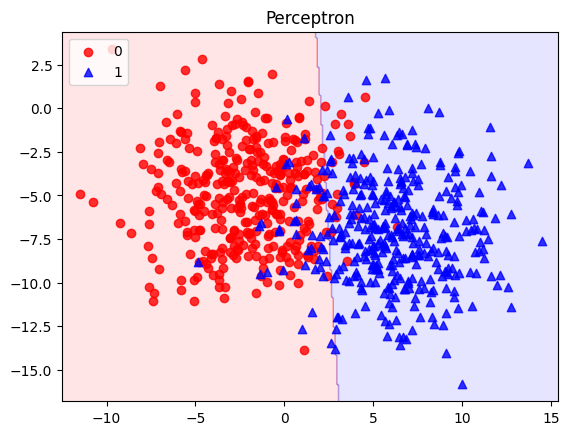

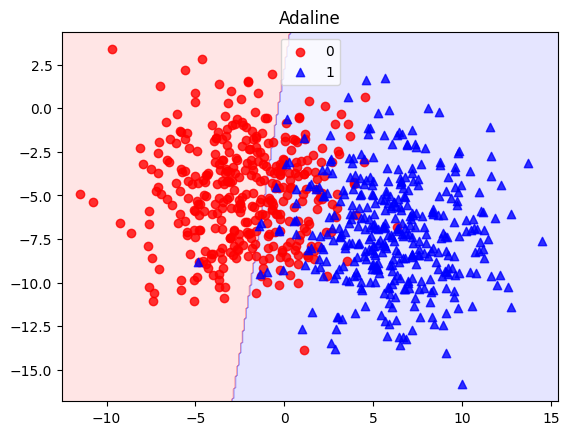

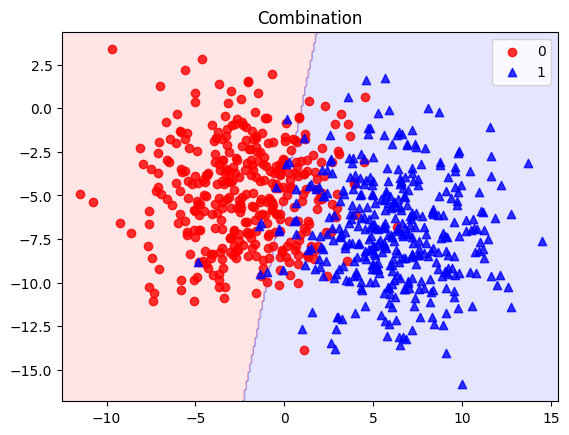


*****************************************

Perceptron Accuracy: 88.4%
Adaline Accuracy: 79.2%
Combination Accuracy: 86.4%


In [40]:
from sklearn.metrics import accuracy_score

ppn = Perceptron(eta=0.1,n_iter=100)
ppn.fit(X2,y2)
plot_decision_regions(X2, y2, classifier=ppn)
plt.title("Perceptron")
plt.legend(loc='upper left')
plt.show()


X_std = np.copy(X2)
X_std[:, 0] = (X_std[:, 0] - X_std.mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std.mean()) / X_std[:, 1].std()

ada = Adaline(eta=0.0001,n_iter=200).fit(X_std, y2)
plot_decision_regions(X2, y2, classifier=ada)
plt.title("Adaline")
plt.legend(loc="upper center")
plt.show()


comb = CombineAdalinePerceptron(eta_a=0.5,eta_p=0.1, n_iter=100).fit(X_std, y2)
plot_decision_regions(X2, y2, classifier=comb)
plt.title("Combination")
plt.legend(loc="upper right")
plt.show()

y_pred_perceptron = ppn.predict(X2_test)
y_pred_adaline = ada.predict(X2_test)
y_pred_comb = comb.predict(X2_test)

y_pred_adaline = [0 if label == -1 else label for label in y_pred_adaline]


# Evaluate
print("\n*****************************************\n")

print(f'Perceptron Accuracy: {accuracy_score(y_pred_perceptron, y2_test)*100}%' )
print(f'Adaline Accuracy: {accuracy_score(y_pred_adaline, y2_test)*100}%')
print(f'Combination Accuracy: {accuracy_score(y_pred_comb, y2_test)*100}%')


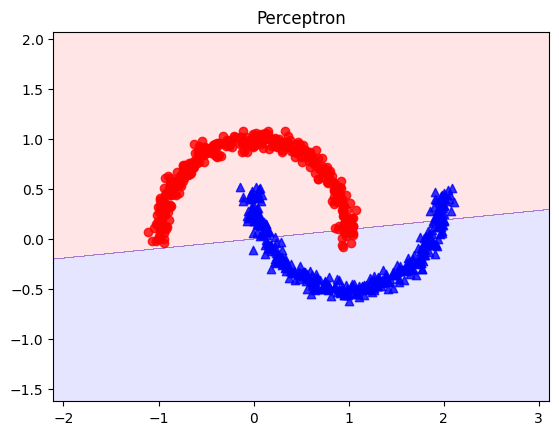

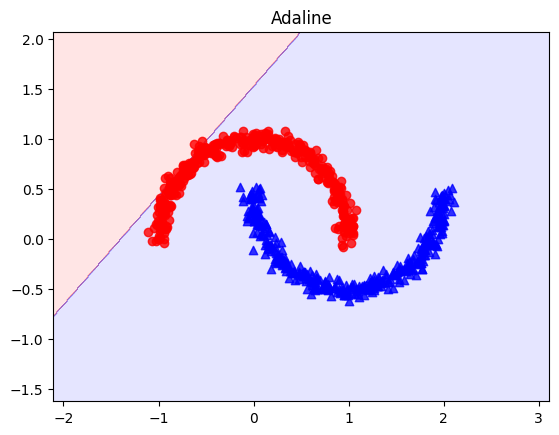

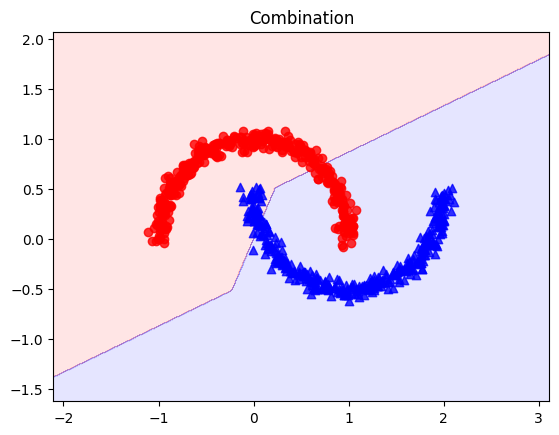


*****************************************

Perceptron Accuracy: 88.0%
Adaline Accuracy: 52.0%
Combination Accuracy: 83.2%


In [51]:
ppn = Perceptron(eta=0.01,n_iter=100)
ppn.fit(X3,y3)
plot_decision_regions(X3, y3, classifier=ppn,resolution=0.01)
plt.title("Perceptron")
plt.show()


X_std = np.copy(X3)
X_std[:, 0] = (X_std[:, 0] - X_std.mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std.mean()) / X_std[:, 1].std()

ada = Adaline(eta=0.0000000001,n_iter=100).fit(X_std, y3)
plot_decision_regions(X3, y3, classifier=ada,resolution=0.01)
plt.title("Adaline")
plt.show()

comb = CombineAdalinePerceptron(eta_a=0.5,eta_p=0.5, n_iter=1000).fit(X_std, y3)
plot_decision_regions(X3, y3, classifier=comb,resolution=0.01)
plt.title("Combination")
plt.show()

y_pred_perceptron = ppn.predict(X3_test)
y_pred_adaline = ada.predict(X3_test)
y_pred_comb = comb.predict(X3_test)

y_pred_adaline = [0 if label == -1 else label for label in y_pred_adaline]


# Evaluate
print("\n*****************************************\n")

print(f'Perceptron Accuracy: {accuracy_score(y_pred_perceptron, y3_test)*100}%' )
print(f'Adaline Accuracy: {accuracy_score(y_pred_adaline, y3_test)*100}%')
print(f'Combination Accuracy: {accuracy_score(y_pred_comb, y3_test)*100}%')